In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix
from sklearn.ensemble import RandomForestClassifier ,GradientBoostingClassifier

In [ ]:
df=pd.read_csv("/content/user_behavior_dataset.csv")
print(df.shape)
df.sample(5)

(700, 11)


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
15,16,Google Pixel 5,Android,503,10.4,2571,84,2025,39,Female,5
487,488,iPhone 12,iOS,228,4.4,1734,46,804,57,Female,3
307,308,OnePlus 9,Android,410,7.5,2176,68,1213,45,Female,4
53,54,Xiaomi Mi 11,Android,97,2.2,1101,38,375,53,Male,2
302,303,iPhone 12,iOS,469,6.0,2290,67,1086,34,Female,4


In [ ]:
df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


In [ ]:
df.columns.tolist()

['User ID',
 'Device Model',
 'Operating System',
 'App Usage Time (min/day)',
 'Screen On Time (hours/day)',
 'Battery Drain (mAh/day)',
 'Number of Apps Installed',
 'Data Usage (MB/day)',
 'Age',
 'Gender',
 'User Behavior Class']

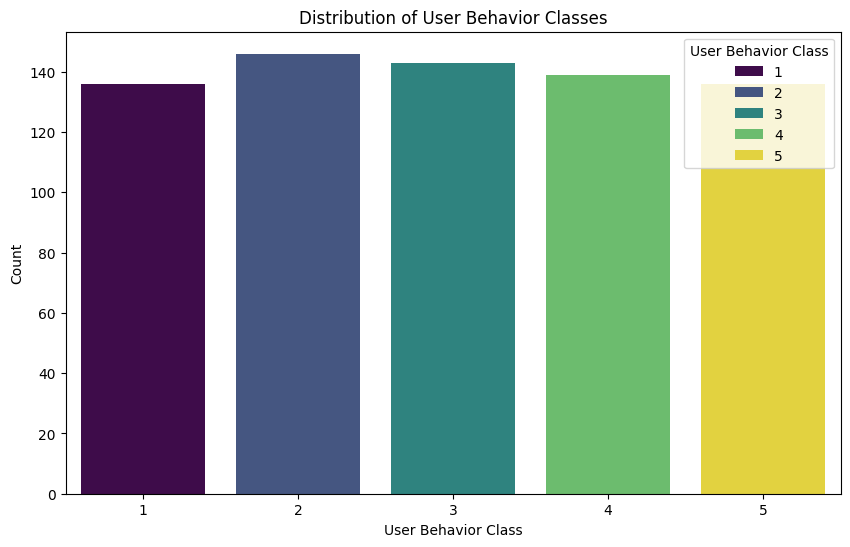

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='User Behavior Class',hue='User Behavior Class', data=df, palette='viridis')
plt.title('Distribution of User Behavior Classes')
plt.xlabel('User Behavior Class')
plt.ylabel('Count')
plt.show()

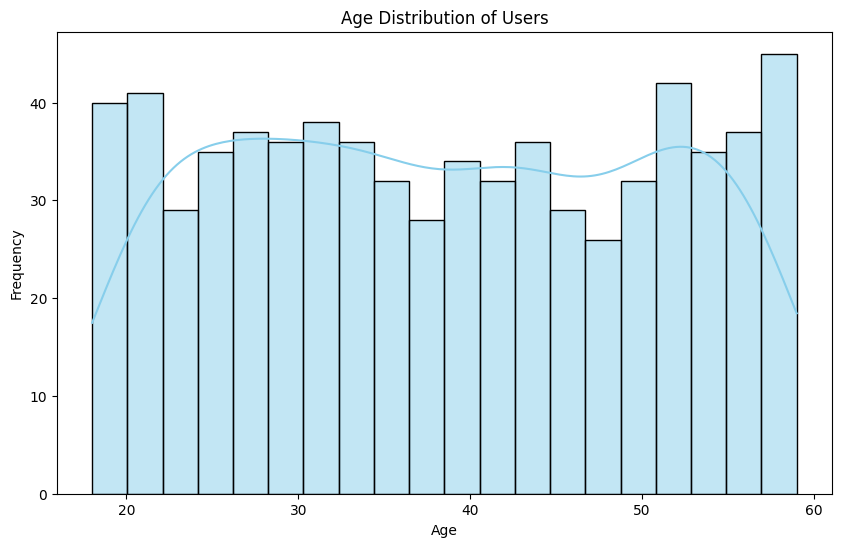

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

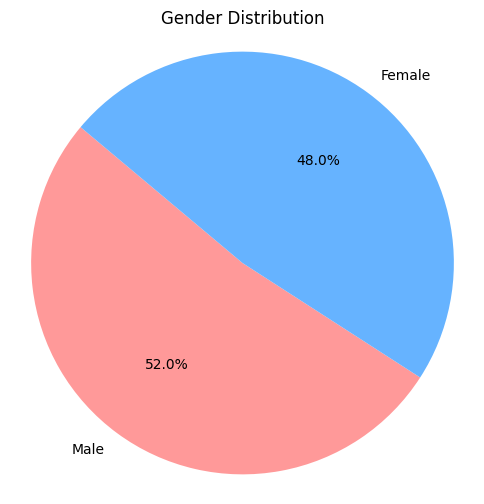

In [ ]:
plt.figure(figsize=(6, 6))
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

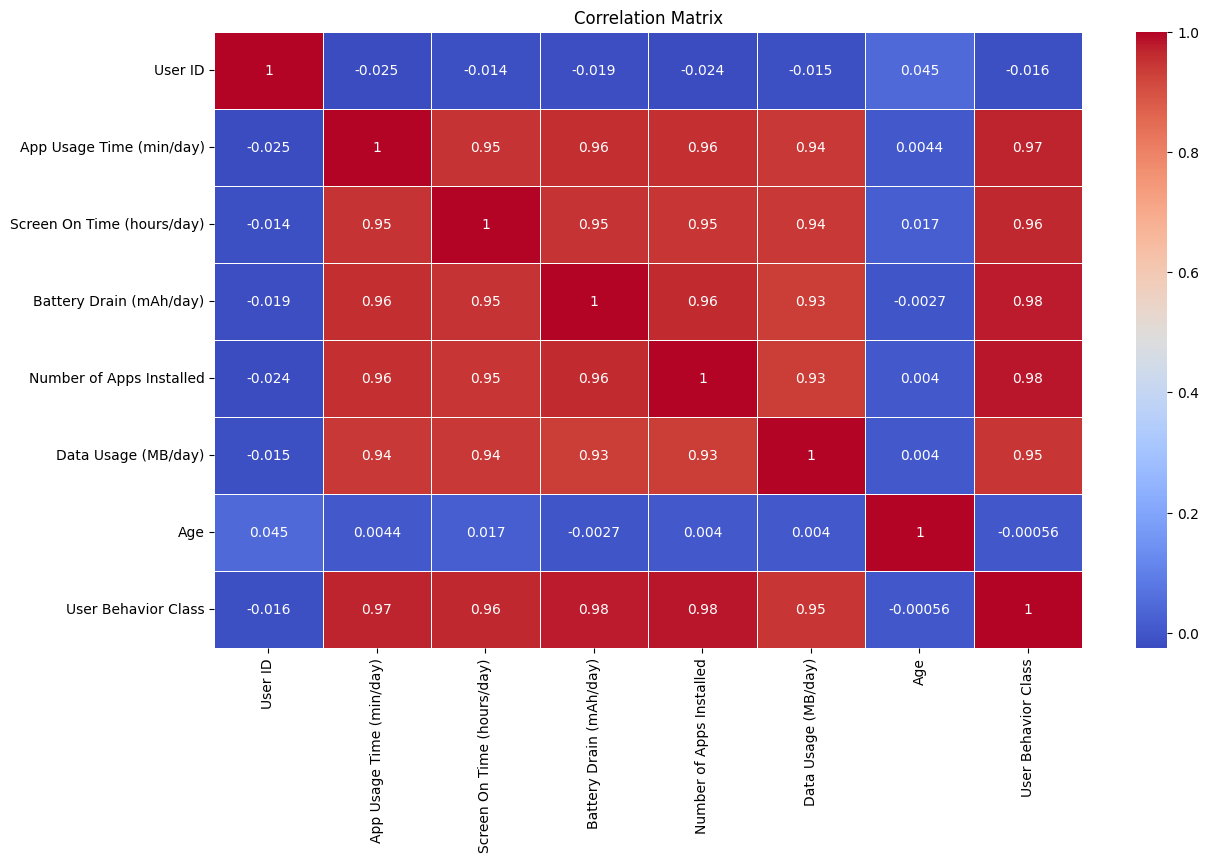

In [ ]:

corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(14, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:

categorical_vars= df.select_dtypes(include='object').columns.tolist()
print(categorical_vars)

['Device Model', 'Operating System', 'Gender']


In [ ]:
df = pd.get_dummies(df, columns=['Operating System'], drop_first=True)
le = LabelEncoder()
#df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
X = df.drop(['User ID', 'User Behavior Class','Age','Gender','Device Model'], axis=1)
y = df['User Behavior Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
numerical_features = ['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)','Number of Apps Installed', 'Data Usage (MB/day)']
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
X_train.head()

,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Operating System_iOS
37,1.418401,1.928545,1.562329,1.567084,2.158257,False
430,-0.028708,0.075247,-0.351144,0.309825,-0.143963,True
637,-1.063165,-1.355370,-1.194534,-1.502108,-0.994347,False
454,-0.723999,-0.444977,-0.446208,-0.984413,-0.825816,True
126,0.344375,0.693013,0.759158,0.642629,0.601282,True


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=0)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt}")

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        27

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Decision Tree Accuracy: 1.0


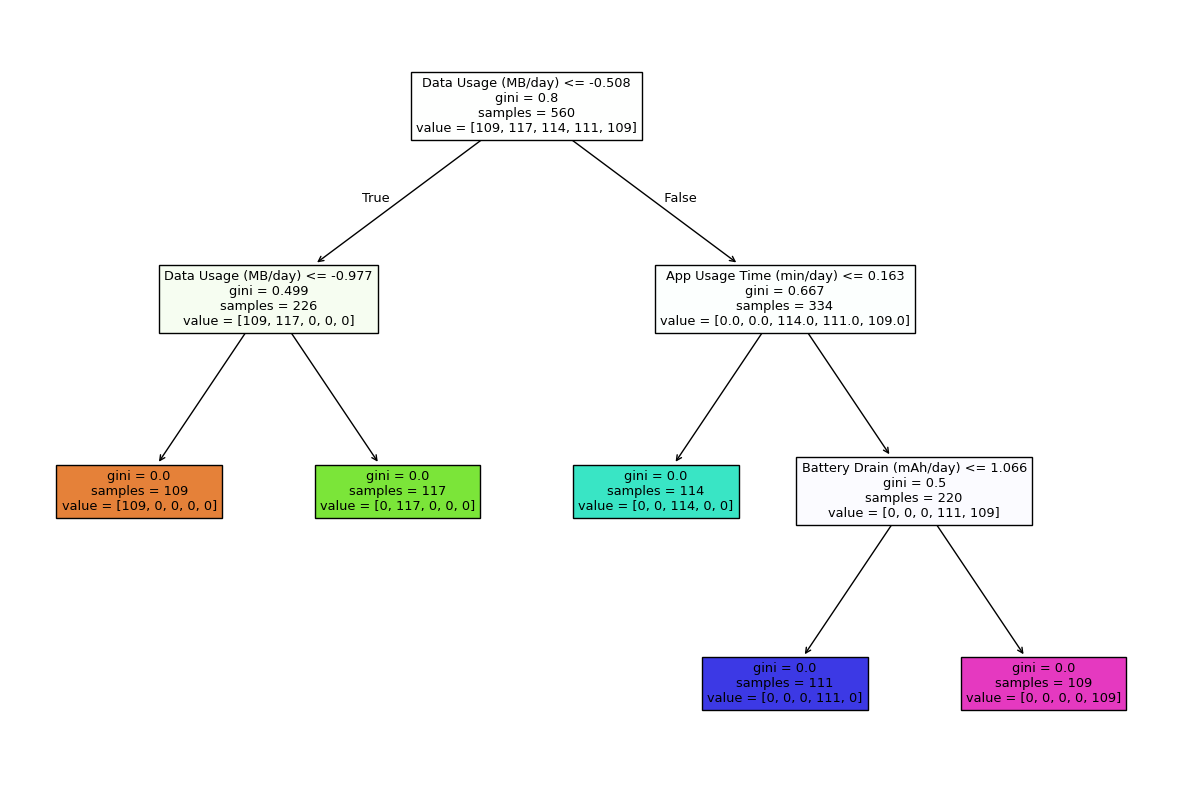

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt, filled=True, feature_names=X.columns)
plt.show()

In [ ]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        27

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [ ]:
#RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        27

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [ ]:
# Accuracy scores
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_gb = accuracy_score(y_test, y_pred_gb)

print(f"Random Forest Accuracy: {acc_rf:.2f}")
print(f"Gradient Boosting Accuracy: {acc_gb:.2f}")

Random Forest Accuracy: 1.00
Gradient Boosting Accuracy: 1.00


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes Classifier Report:")
print(classification_report(y_test, y_pred_nb))

acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {acc_nb:.2f}")

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        27

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

Naive Bayes Accuracy: 1.00


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model= SVC(kernel='rbf',C=1, random_state=0)
svc_model.fit(X_train, y_train)
y_pred_svc= svc_model.predict(X_test)
print("SVC Classifier Report:")
print(classification_report(y_test, y_pred_svc))
acc_svc= accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy:{acc_svc:.2f}")

SVC Classifier Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        28
           5       1.00      1.00      1.00        27

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140

SVC Accuracy:1.00


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_rf= GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
grid_search_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [ ]:
grid_search_rf.best_estimator_

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
importances = grid_search_rf.best_estimator_.feature_importances_
importances

array([0.22641654, 0.09616438, 0.19639055, 0.23682604, 0.24420249,
       0.        ])

In [ ]:
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

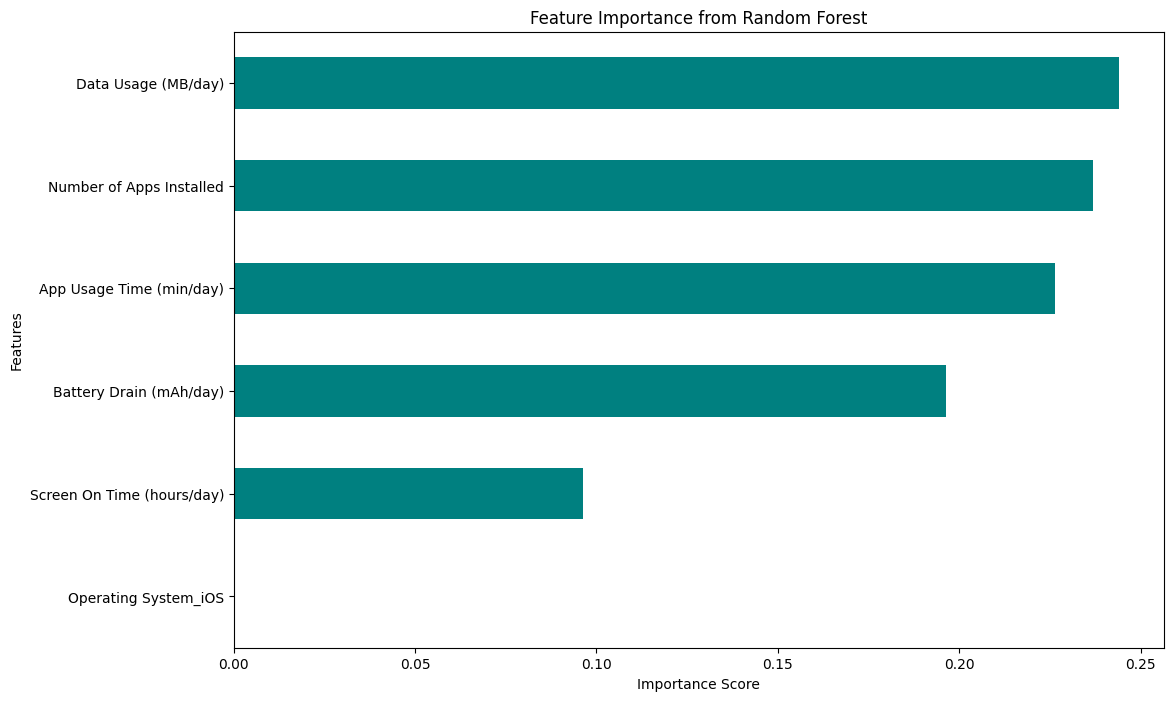

In [ ]:
plt.figure(figsize=(12, 8))
forest_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
}

In [ ]:
grid_search_gb = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid_gb,
    cv=5,
    scoring='accuracy',
    n_jobs=-1  # For faster execution
)

grid_search_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best_gb_model = grid_search_gb.best_estimator_
best_gb_model

GradientBoostingClassifier(learning_rate=0.01, n_estimators=50, random_state=42)

In [ ]:
grid_search_gb.best_score_

1.0

In [ ]:
importances_gb = best_gb_model.feature_importances_
feature_names = X.columns
forest_importances_gb = pd.Series(importances_gb, index=feature_names)


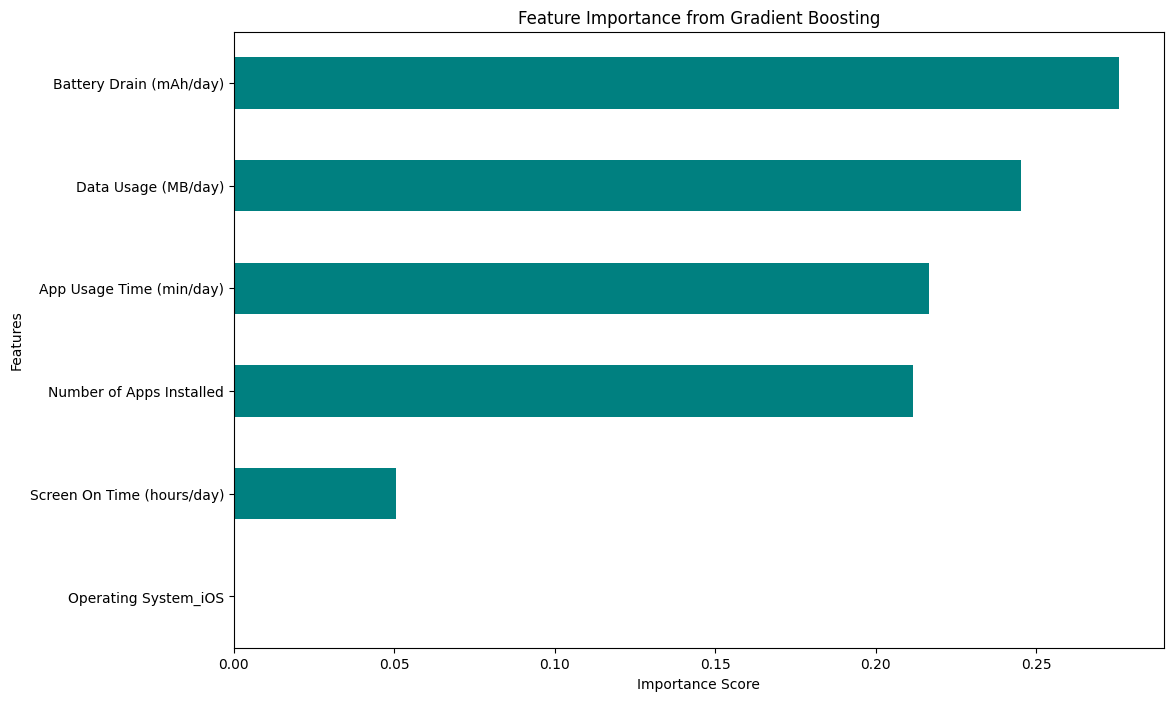

In [ ]:
plt.figure(figsize=(12, 8))
forest_importances_gb.nlargest(10).plot(kind='barh', color='teal')
plt.title('Feature Importance from Gradient Boosting')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.gca().invert_yaxis()
plt.show()
